<a href="https://colab.research.google.com/github/BobojonM/NeuralNetworks/blob/main/Seminar_Week_5_simpsons_baseline_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework. Image classification

Today you have to help the FOX television company in processing their content. As you know, the series "The Simpsons" has been on television for more than 25 years, and during this time a lot of video material has accumulated. Characters have changed along with changing graphics technology, and 2018 Homer Simpson doesn't look much like 1989 Homer Simpson. In this task you need to classify the characters living in Springfield. I think there is no point in presenting each of them separately.



### Installing requirements

In [1]:
# !wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
# !chmod +x mini.sh
# !bash ./mini.sh -b -f -p /usr/local
# !conda install -q -y jupyter
# !conda install -q -y google-colab -c conda-forge
# !python -m ipykernel install --name "py3.10" --user

In [2]:
!python --version

Python 3.10.12


In [6]:
!pip install -U torch torchvision
!pip install wheel==0.34.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 109.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

  Attempting uninstall: wheel
    Found existing installation: wheel 0.41.2
    Uninstalling wheel-0.41.2:
      Successfully uninstalled wheel-0.41.2


In [7]:
# installing the appropriate version of torch

# from os.path import exists
# from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
# platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
# cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
# accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

# !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
!pip install -q http://download.pytorch.org/whl/cu118/torch-2.1.0%2Bcu118-cp310-cp310-linux_x86_64.whl torchvision
import torch

ERROR: torch-2.1.0+cu118-cp310-cp310-linux_x86_64.whl is not a supported wheel on this platform.


In [8]:
# we will verify that GPU is enabled for this notebook
# following should print: CUDA is available!  Training on GPU ...
#
# if it prints otherwise, then you need to enable GPU:
# from Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU

import torch
print(torch.__version__ )
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

2.1.1+cu121
CUDA is available!  Training on GPU ...


In [1]:
# we need pillow version 5.3.0
# remove the old version and install the new one
# !pip uninstall -y Pillow
# !pip install Pillow==5.3.0
import PIL
print(PIL.PILLOW_VERSION)
# this should be version 5.3.0. if this is not the case, reboot this notebook:
# Menu > Runtime > Restart Runtime

AttributeError: ignored

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [8]:
import os
os.listdir("/content/gdrive/MyDrive/contest")

['train.zip', 'test.zip']

In [9]:
!unzip -q /content/gdrive/MyDrive/contest/train.zip -d train
!unzip -q /content/gdrive/MyDrive/contest/test.zip -d test

In [10]:
!ls train

__MACOSX  train


In [11]:
!ls test

__MACOSX  test


In [12]:
!nvidia-smi
import torch
torch.cuda.is_available()

Sat Nov 18 17:01:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In our test there will be 990 pictures for which you will need to predict the class.

In [13]:
import pickle
import numpy as np
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline

# in sklearn not everything is smooth, so that it is convenient to display pictures in colab
# we will ignore warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


In [14]:
# different dataset modes
DATA_MODES = ['train', 'val', 'test']
# all images will be scaled to 224x224 px
RESCALE_SIZE = 224
# work on a video card
DEVICE = torch.device("cuda")

https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/


Below we use a wrapper over the dataset for convenient work. You should understand what's going on with LabelEncoder and torch.Transformation.

ToTensor converts a PIL Image with parameters in the range [0, 255] (as all pixels) into a FloatTensor of size (C x H x W) [0,1] , then scales:
$input = \frac{input - \mu}{\text{standard deviation}} $, <br>       constants - means and variances across channels based on ImageNet


It is also worth noting that we are overriding the __getitem__ method to make it easier to work with this data structure.
  LabelEncoder is also used to convert string class labels to ids and back. The description of the dataset states that the pictures are of different sizes, since they were taken directly from the video, so we should bring them to the same size (this is done by the _prepare_sample method)

In [15]:
import csv

class SimpsonsDataset(Dataset):
    """
    A dataset with pictures that simultaneously loads them from folders
     performs scaling and transformation into butt tensors
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)

        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            # Replace 'your_file.csv' with the path to your CSV file
            csv_file_path = 'train/train/train.csv'

            self.labels = []

            with open(csv_file_path, newline='') as csvfile:
                csvreader = list(csv.DictReader(csvfile))

                for path in self.files:
                    for row in csvreader:
                        if row['img'] == path.name:
                            self.labels.append(row['class'])

            # self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)

    def __len__(self):
        return self.len_

    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image

    def __getitem__(self, index):
        # to convert images to PyTorch tensors and normalize input
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y

    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [16]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [17]:
import os
os.listdir("train/train")

['.DS_Store', 'train.csv', 'images']

In [179]:
import csv

# Replace 'your_file.csv' with the path to your CSV file
csv_file_path = 'train/train/train.csv'

with open(csv_file_path, newline='') as csvfile:
    csvreader = csv.DictReader(csvfile)

    # Each row is a dictionary. Print row by row, or access individual fields.
    # for row in csvreader:
    #   print(row['img'])


In [18]:
TRAIN_DIR = Path('train/train/images')
TEST_DIR = Path('test/test/images')

train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))
# print(train_val_files)
# print(test_files)

In [19]:
from sklearn.model_selection import train_test_split
import csv

# Replace 'your_file.csv' with the path to your CSV file
csv_file_path = 'train/train/train.csv'

train_val_labels = [] #[path.parent.name for path in train_val_files]

with open(csv_file_path, newline='') as csvfile:
    csvreader = list(csv.DictReader(csvfile))

    for path in train_val_files:
        for row in csvreader:
            if row['img'] == path.name:
                train_val_labels.append(row['class'])

train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels)

# print(train_files, val_files)

In [20]:
val_dataset = SimpsonsDataset(val_files, mode='val')
len(val_dataset)

727

In [183]:
# uncomment if you have problem with pillow
# def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
# Image.register_extension = register_extension
# def register_extensions(id, extensions):
#     for extension in extensions: register_extension(id, extension)
# Image.register_extensions = register_extensions

!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py39_23.10.0-1-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py3.9" --user

--2023-11-18 16:36:43--  https://repo.anaconda.com/miniconda/Miniconda3-py39_23.10.0-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111166050 (106M) [application/x-sh]
Saving to: ‘mini.sh’

mini.sh             100%[===================>] 106.02M   164MB/s    in 0.6s    

2023-11-18 16:36:44 (164 MB/s) - ‘mini.sh’ saved [111166050/111166050]

PREFIX=/usr/local
Unpacking payload ...
Traceback (most recent call last):
  File "threading.py", line 312, in wait
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "concurrent/futures/_base.py", line 441, in result
  File "threading.py", line 321, in wait
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most 

In [21]:
!python --version

Python 3.10.12


Let's take a look at our heroes inside the dataset.

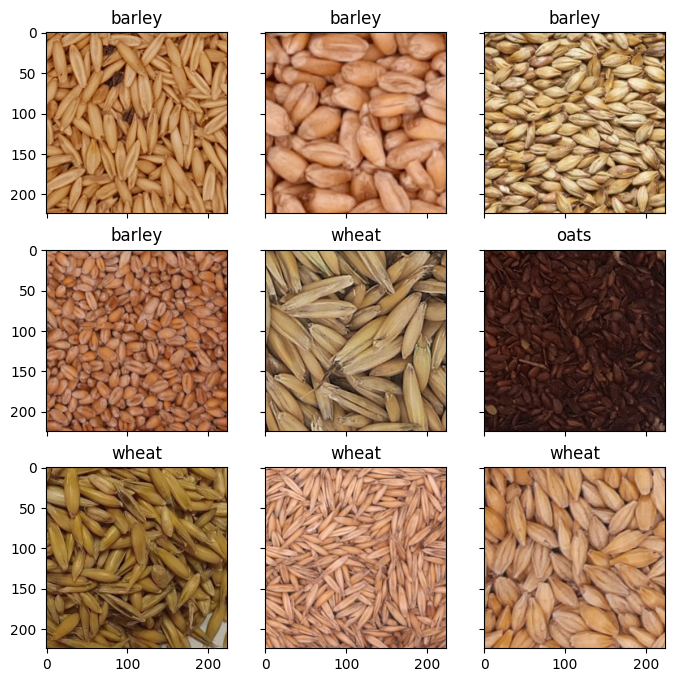

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,700))
    im_val, label = val_dataset[random_characters]
    img_label = train_val_labels[random_characters]
    # img_label = " ".join(map(lambda x: x.capitalize(),\
    #             val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    # print(img_label)
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

You can add your favorite scenes and categorize them. (funny results can be thrown into the chat)

### Building a neural network

Launching this network will be your mini-task for the first week to make it easier to participate in the competition.

This architecture will be very simple and is needed in order to establish a basic understanding and get a simple submission to Kaggle


*Description of layers*:



1. input dimension: 3x224x224
2.dimensions after layer: 8x111x111
3. 16x54x54
4. 32x26x26
5. 64x12x12
6. output: 96x5x5


In [23]:
class SimpleCnn(nn.Module):

    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.out = nn.Linear(96 * 5 * 5, n_classes)


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits

In [220]:
class cnn(nn.Module):

    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.fc1 = nn.Sequential(
            nn.Linear(in_features=2400, out_features=4800),
            nn.ReLU()
        )

        self.fc2 = nn.Sequential(
            nn.Linear(in_features=4800, out_features=4800),
            nn.ReLU(),
        )

        self.fc3 = nn.Sequential(
            nn.Linear(in_features=4800, out_features=42)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [154]:
def fit_epoch(model, train_loader, criterion, optimizer, scheduler):

    model.train(True)

    running_loss = 0.0
    running_corrects = 0
    processed_data = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)

    scheduler.step()
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [155]:
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [156]:
def train(train_files, val_files, model, epochs, batch_size):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.Adam(model.parameters(), lr=1e-3)
        criterion = nn.CrossEntropyLoss()
        scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=5, gamma=0.1)

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt, scheduler)
            print("loss", train_loss)

            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))

            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))

    return history

In [157]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []

        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)

    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [221]:
n_classes = len(np.unique(train_val_labels))
s_cnn = cnn(n_classes).to(DEVICE)
print("we will classify :{}".format(n_classes))
# print(s_cnn)

we will classify :4


In [159]:
from torchvision.models import resnet50, ResNet50_Weights

weights = ResNet50_Weights.DEFAULT
resnet = resnet50(weights=weights)

# Set requires_grad = False for all parameters
for param in resnet.parameters():
    param.requires_grad = False

# Re-enable requires_grad for the last 3 layers
layers = list(resnet.children())
for layer in layers[-3:]:
    for param in layer.parameters():
        param.requires_grad = True

In [160]:
in_features = 2048
out_features = 42
resnet.fc = nn.Linear(in_features, out_features)
resnet = resnet.to(DEVICE)

Let's start training the network.

In [161]:
if val_dataset is None:
    val_dataset = SimpsonsDataset(val_files, mode='val')

train_dataset = SimpsonsDataset(train_files, mode='train')

# print(list(val_dataset))
# print(list(train_dataset))

In [162]:
history = train(train_dataset, val_dataset, model=resnet, epochs=10, batch_size=64)

epoch:   0%|          | 0/10 [00:00<?, ?it/s]

loss 0.5265844643471601


epoch:  10%|█         | 1/10 [00:31<04:43, 31.46s/it]


Epoch 001 train_loss: 0.5266     val_loss 0.1607 train_acc 0.8798 val_acc 0.9656
loss 0.10309936984956347


epoch:  20%|██        | 2/10 [01:02<04:09, 31.24s/it]


Epoch 002 train_loss: 0.1031     val_loss 0.1229 train_acc 0.9752 val_acc 0.9670
loss 0.0552682175705771


epoch:  30%|███       | 3/10 [01:33<03:38, 31.27s/it]


Epoch 003 train_loss: 0.0553     val_loss 0.0871 train_acc 0.9876 val_acc 0.9711
loss 0.04896710903314124


epoch:  40%|████      | 4/10 [02:05<03:08, 31.36s/it]


Epoch 004 train_loss: 0.0490     val_loss 0.0863 train_acc 0.9858 val_acc 0.9835
loss 0.05309103984264345


epoch:  50%|█████     | 5/10 [02:36<02:37, 31.46s/it]


Epoch 005 train_loss: 0.0531     val_loss 0.0743 train_acc 0.9853 val_acc 0.9766
loss 0.020074146009465322


epoch:  60%|██████    | 6/10 [03:08<02:05, 31.46s/it]


Epoch 006 train_loss: 0.0201     val_loss 0.0615 train_acc 0.9950 val_acc 0.9835
loss 0.012680013929059906


epoch:  70%|███████   | 7/10 [03:39<01:34, 31.43s/it]


Epoch 007 train_loss: 0.0127     val_loss 0.0624 train_acc 0.9972 val_acc 0.9849
loss 0.015118873747815337


epoch:  80%|████████  | 8/10 [04:11<01:03, 31.50s/it]


Epoch 008 train_loss: 0.0151     val_loss 0.0519 train_acc 0.9968 val_acc 0.9849
loss 0.011723451667686239


epoch:  90%|█████████ | 9/10 [04:43<00:31, 31.51s/it]


Epoch 009 train_loss: 0.0117     val_loss 0.0478 train_acc 0.9968 val_acc 0.9849
loss 0.014217198669513795


epoch: 100%|██████████| 10/10 [05:14<00:00, 31.48s/it]


Epoch 010 train_loss: 0.0142     val_loss 0.0546 train_acc 0.9972 val_acc 0.9849


Let's build learning curves

In [163]:
loss, acc, val_loss, val_acc = zip(*history)
print(loss, acc, val_loss, val_acc)

(0.5265844643471601, 0.10309936984956347, 0.0552682175705771, 0.04896710903314124, 0.05309103984264345, 0.020074146009465322, 0.012680013929059906, 0.015118873747815337, 0.011723451667686239, 0.014217198669513795) (0.8797613584212942, 0.9752179899036255, 0.9876089949518128, 0.9857732905002294, 0.9853143643873337, 0.9949518127581459, 0.997246443322625, 0.9967875172097292, 0.9967875172097292, 0.997246443322625) (0.16065971540002744, 0.12292040816855397, 0.08714911904303867, 0.08634424526782443, 0.07434550762955391, 0.06153121749976806, 0.062418296364388406, 0.051903438074142765, 0.04778427851771964, 0.05464528772488052) (tensor(0.9656, device='cuda:0', dtype=torch.float64), tensor(0.9670, device='cuda:0', dtype=torch.float64), tensor(0.9711, device='cuda:0', dtype=torch.float64), tensor(0.9835, device='cuda:0', dtype=torch.float64), tensor(0.9766, device='cuda:0', dtype=torch.float64), tensor(0.9835, device='cuda:0', dtype=torch.float64), tensor(0.9849, device='cuda:0', dtype=torch.float

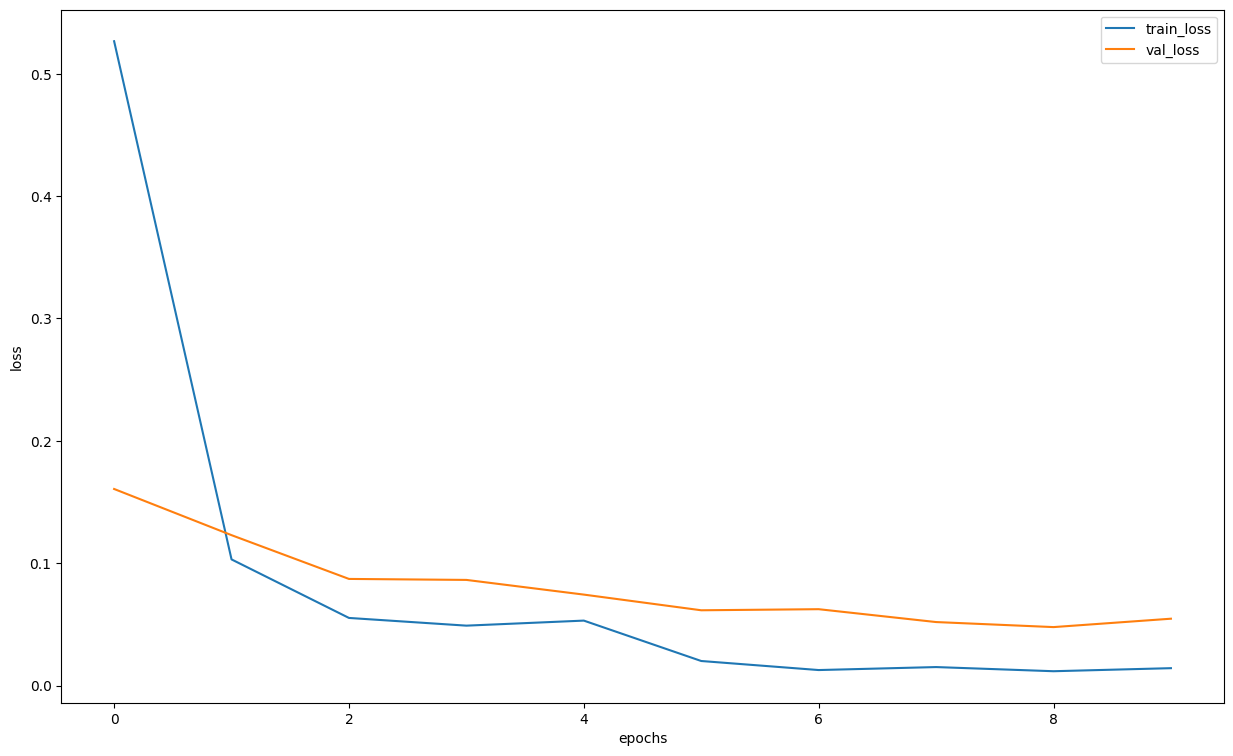

In [164]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### So what should we do with all this now?

![alt text](https://www.indiewire.com/wp-content/uploads/2014/08/the-simpsons.jpg)

It would be nice to understand how to submit.
We have a network and its eval methods, which allow us to put the network into prediction mode. It is worth understanding that our model has a softmax on the last layer, which allows us to obtain a vector of probabilities that an object belongs to a particular class. Let's take advantage of this.

In [165]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Prediction, for one picture"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [227]:
random_characters = int(np.random.uniform(0,700))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(resnet, ex_img.unsqueeze(0))

In [228]:
idxs = list(map(int, np.random.uniform(0,700, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]
probs_ims = predict(resnet, imgs)


In [229]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [231]:
y_pred = np.argmax(probs_ims,-1)
actual_labels = [val_dataset[id][1] for id in idxs]
preds_class = [label_encoder.classes_[i] for i in y_pred]


Please note that the metric that needs to be optimized in the competition is f1-score. Let's calculate the target metric on the validation set.

In [236]:
from sklearn.metrics import f1_score
f1_score(actual_labels, y_pred, average='micro')

1.0

Let's make a cool visualization to see how confident the network is in
your answers. You can use this to debug whether the output is correct.

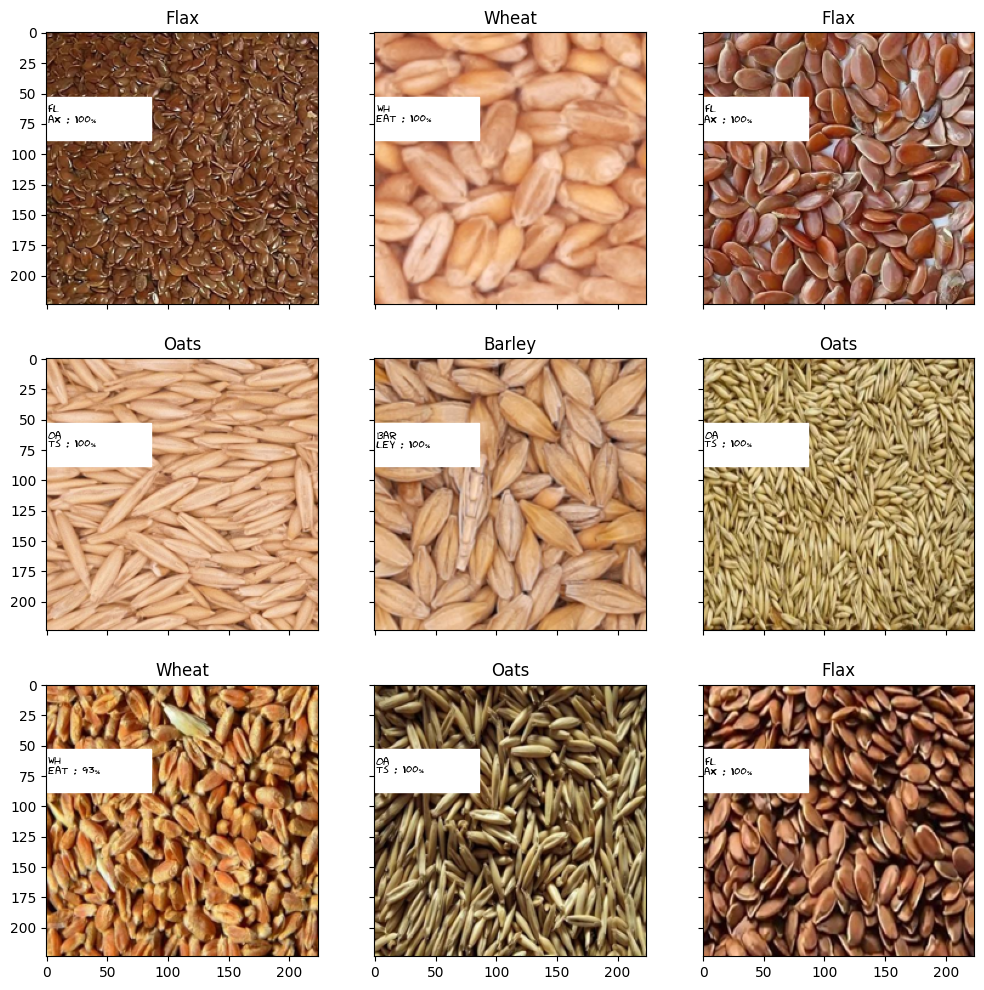

In [238]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,700))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))



    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

    actual_text = "Actual : {}".format(img_label)

    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(resnet, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)

    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)

    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

Try to find those classes that the network could not recognize. Study this problem, it will be needed in the future.

### Submit to Kaggle

![alt text](https://i.redd.it/nuaphfioz0211.jpg)

In [239]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(resnet, test_loader)


preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]

In [240]:
import csv

# Data to be written
header = ['img', 'class']

# File path for the CSV file
csv_file_path = 'test.csv'

# Open the file in write mode ('w')
with open(csv_file_path, mode='w', newline='') as file:
  writer = csv.writer(file)
  # Write the header
  writer.writerow(header)
  for i in range(0, len(preds)):
    #print(test_filenames[i], preds[i])
    row = [test_filenames[i], preds[i]]

    # Write the data row
    writer.writerow(row)

In [241]:
! ls

gdrive	label_encoder.pkl  output.csv  sample_data  test  test.csv  train


In [242]:
import pandas as pd
my_submit = pd.read_csv("test.csv") #pd.read_csv("test/test/test.csv")
# my_submit = pd.DataFrame({'Image_id': test_filenames, 'Expected': preds})
my_submit.head()

,img,class
0,aaimqegysryoapsnjnanefjxflotptsuattxbuej.jpg,oats
1,aaltidfqraaqcidaagajlwgnodenpsixmwxrvwce.jpg,oats
2,aaocvdlkcujgqbijuucgupzcvyowewxevhzggqga.jpg,flax
3,aateriexgibklnfgdwbncaxlecfehpultxxgpklv.jpg,wheat
4,aaznianqokplnygaenlqkctteeapmmatvoqkzcik.jpg,barley


In [243]:
from google.colab import files
files.download("test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# TODO : make a submission (this is important, if you can’t cope, but have reached this cell, then let me know in the chat and I’ll help)

In [ ]:
my_submit.to_csv('gdrive/My Drive/simpsons/simple_cnn_baseline.csv', index=False)

## Tasks

And now the most interesting thing is that we made a simple convolutional network and were able to send a submission, but the resulting speed clearly does not suit us. We need to do something about this.

A few urgent improvements for our network that probably came to your mind:


* We study longer and change network hyperparameters
* learning rate, batch size, image normalization and that’s all
* Who builds neural networks like this? Where are the pooling and batch norms? Need to add
* Well, is Adam our everything? [adamW](https://www.fast.ai/2018/07/02/adam-weight-decay/) for practitioners, [article for amateurs](https://openreview.net/pdf?id=ryQu7f-RZ) (very good analysis), [our](https://github.com/MichaelKonobeev/adashift/) experiments for those interested.
* Is this really deep learning? Here are ResNet and Inception, which can be tuned to our data, this is what I understand (you can train it in a colab, or you can download [ready-made ones](https://github.com/Cadene/pretrained-models.pytorch)).

* There is not a lot of data, you can augment it and learn more on a new dataset (which will already consist of, as an example of augmentation, inverted images)

* It's worth thinking about ensembles

* All experiments must be provided with logs. We use WanDB (https://wandb.ai)

